# Bellabeat - How can a wellness technology company play it smart?

_This project is a capstone of my "Google Data Analytics" specialization certificate._

**DESCRIPTION**<br><br>
In this case study I conduct an analysis for Bellabeat - a high-tech manufacturer of health-focused products for women. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. By 2016, the company had opened offices around the world and launched multiple products, like:
- **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
- **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
- **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
- **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
- **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

**TASK**<br><br>
The task given by the founders is to analyze non-Bellabeat smart device data and get insights into how customers are using their smart devices.
Then one of Bellabeat products has to be selected to apply these insights to. Thus the discovered insights will help guide marketing strategy for the company.
The following questions should be answered:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**PREPARATION STAGE**<br><br>
For this project I'm asked to use the public data that explores smart device users' daily habits - **FitBit Fitness Tracker Data** *(CC0: Public Domain, dataset made available trough Mobius)*. This Kaggle dataset contains personal fitness tracker from thirty Fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

After quick exploration of said data, let's summarize:

1. The data is stored as a collection of separate CSV files.
2. The data is organized in long format.
3. The data is generated by respondents to a distributed survey via Amazon Mechanical Turk between 04.12.2016-05.12.2016, thus potentially there might be selection bias.
4. Our analysis target audience is women, but we have no information regarding respondents of the dataset we analyze - gender, age, ethnicity  are unknown, thus potentially bias might be introduced.
5. The data has been collected in 2016, since that time technologies have developed and the accuracy of new devices is better. Also the rythm of life (and thus respondents' patterns of behaviour and habits) could have changed during this period of time.

**DATA PROCESSING** <br><br>
In order to conduct the analysis I will use Python programming language. First we need to choose which CSV files we'll use, import them, clean the data and make it ready to analyze.

Our main table will be **daily_activity_merged.csv** which contains a collection of various data about users' activity such as Total Steps, Total Distance Walked, Active Minutes, Calories Burned.
Additionally we explore **heartrate_seconds_merged.csv** for analysis of heartrate records and **sleep_day_merged.csv** and **weight_log_info_merged.csv** for sleep data and weight records accordingly.

Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

Importing selected csv files:

In [2]:
daily_activity = pd.read_csv('daily_activity_merged.csv')
heartrate_seconds = pd.read_csv('heartrate_seconds_merged.csv')
daily_sleep = pd.read_csv('sleep_day_merged.csv')
weight_log = pd.read_csv('weight_log_info_merged.csv')
print("Database files have been imported")

Database files have been imported


Let's have a look at quick preview of each dataset:

### - daily_activity:<br>

In [3]:
daily_activity.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863

Now let's check the data types:

In [4]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Here I see that *ActivityDate* coulumn is identified as carrying characters but we need to amend it's format to "Date" type to facilitate further analysis.

In [5]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
daily_activity.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Great, data types are in order after our manipulation.

Now, as we have have correct datatypes, let's explore the data further.<br>
A column that seems redundant is the **TrackerDistance**. At first sight it seems to coincide with **TotalDistance** column. Let's summarize all values of both columns separately and then perform subtraction operaton to find out if there is any difference

In [6]:
print(f"""Sum of TotalDistance column is {daily_activity["TotalDistance"].sum()}, 
whereas sum of TrackerDistance column is {daily_activity["TrackerDistance"].sum()},
which gives us (TotalDistance - TrackerDistance) result {daily_activity["TotalDistance"].sum() - daily_activity["TrackerDistance"].sum()}""")

Sum of TotalDistance column is 5160.31999460049, 
whereas sum of TrackerDistance column is 5146.829994352534,
which gives us (TotalDistance - TrackerDistance) result 13.490000247955322


As we see the difference is not big, we can assume that it might be an omission in provided dataset, but it's clear that we don't need both columns, so let's keep the one with bigger distance record - **TotalDistance**.<br><br>
Also columns **LoggedActivitiesDistance**, **VeryActiveDistance**, **ModeratelyActiveDistance**, **LightActiveDistance** and **SedentaryActiveDistance** seem to be not very informative, cause Active Time throughout the day gives clearer picture than Active Distance breakdown. On the other hand, TotalDistance is informative enough and can be used for our analysis.<br>
Thus let's delete mentioned columns from the dataset.

In [7]:
deleted_cols = ["TrackerDistance", "LoggedActivitiesDistance", "VeryActiveDistance", 
                "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance"]
daily_activity.drop(columns=deleted_cols, inplace=True)

Let's add a coulmn specifying the day of week, it will assist us in conducting analysis on a later stage.<br>
Additionally, let's calculate a column **TotalActiveMinutes** as a sum of very active, fairly active, lightly active and sedentary minutes.

In [8]:
# Adding a "Day" column, specifying the day of week the record has been taken
daily_activity["Day"] = daily_activity["ActivityDate"].dt.day_name()

# Adding TotalActiveMinutes column
daily_activity["TotalActiveMinutes"] = (daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + 
                                        daily_activity["LightlyActiveMinutes"] + daily_activity["SedentaryMinutes"])

# Adjusting order of the columns in our Data Frame
daily_activity = daily_activity[["Id", "ActivityDate", "Day", "TotalSteps", "TotalDistance", "Calories",
                                "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", 
                                "SedentaryMinutes", "TotalActiveMinutes"]]

The updated **daily_activity** dataset looks as follows:

In [9]:
daily_activity.head()

Id ActivityDate        Day  TotalSteps  TotalDistance  Calories  \
0  1503960366   2016-04-12    Tuesday       13162           8.50      1985   
1  1503960366   2016-04-13  Wednesday       10735           6.97      1797   
2  1503960366   2016-04-14   Thursday       10460           6.74      1776   
3  1503960366   2016-04-15     Friday        9762           6.28      1745   
4  1503960366   2016-04-16   Saturday       12669           8.16      1863   

   VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
0                 25                   13                   328   
1                 21                   19                   217   
2                 30                   11                   181   
3                 29                   34                   209   
4                 36                   10                   221   

   SedentaryMinutes  TotalActiveMinutes  
0               728                1094  
1               776                1033  
2              1218                1440  
3               726                 998  
4               773                1040

Now let's check if there are any empty records in the dataset:

In [10]:
daily_activity.isnull().sum()

Id                      0
ActivityDate            0
Day                     0
TotalSteps              0
TotalDistance           0
Calories                0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
TotalActiveMinutes      0
dtype: int64

Thus our dataset does not contain empty records across all columns, which is good.

Let's check now whether our dataset has duplicated values:

In [11]:
daily_activity.duplicated().sum()

0

Great, the dataset has no duplicated records.

Next step is to check number of unique users of tracking devices:

In [12]:
daily_activity["Id"].nunique()

33

Thus the dataseet is based on record of **33 unique users**.

Let's proceed with other datasets.

### - heartrate_seconds:<br>

In [13]:
heartrate_seconds.head()

Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101

First, we check the datatypes as we did in the previous exmaple.

In [14]:
heartrate_seconds.dtypes

Id        int64
Time     object
Value     int64
dtype: object

Again we see DateTime object identified as text, so let's amend it to Date & Time format. 

In [15]:
heartrate_seconds["Time"] = pd.to_datetime(heartrate_seconds["Time"])
heartrate_seconds.dtypes

Id                int64
Time     datetime64[ns]
Value             int64
dtype: object

Great, so the **heartrate_seconds** dataset has now correct data types.

Our dataset looks as follows:

In [16]:
heartrate_seconds.head()

Id                Time  Value
0  2022484408 2016-04-12 07:21:00     97
1  2022484408 2016-04-12 07:21:05    102
2  2022484408 2016-04-12 07:21:10    105
3  2022484408 2016-04-12 07:21:20    103
4  2022484408 2016-04-12 07:21:25    101

Let's see it there are any missing values.

In [17]:
heartrate_seconds.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

The above table shows that we have no missing/null values in our heartrate_seconds dataset.<br>
Let's now check for duplicates:

In [18]:
heartrate_seconds.duplicated().sum()

0

Zero duplicates - good result.<br>
Next I need to check number of unique users who use heartrate feature on their health device:

In [19]:
heartrate_seconds["Id"].nunique()

14

Ok, here we see that 14 out of 33 users use the heart monitor feature.

#### <font color='green'> And here we can make the first conclusion.<br><br> Out of 33 users, only 14 have used the heartrate monitor, which means that this featue is not that popular and it requires additional analysis on whether to  implement this function for specific category of users or not </font>

We proceed with our other datasets.

### - daily_sleep:

In [20]:
daily_sleep.head()

Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712

Checking the data types:

In [21]:
daily_sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

Again, we see that date values are not correctly imported, thus we need to change its data type for datetime.<br>
Here we should note also that time of record is set by default to 12 AM and is set to this value throughout the entire dataset, which makes no practical use of this time detalization. Thus it's logical for readability and analysis purpose to go one level higher and keep this record in year-month-day format.<br>
Additionally, I will add the **Day** column (to specify the day of the week) and rearrange the columns.

In [22]:
# Setting the format of SleepDay to "datetime"
daily_sleep["SleepDay"] = pd.to_datetime(daily_sleep["SleepDay"], format='mixed')

# Adding new column, specifying day of the week
daily_sleep["Day"] = daily_sleep["SleepDay"].dt.day_name()

#Renaming "SleepDay" column to avoid cunfusing it with new "Day" column
daily_sleep.rename(columns={'SleepDay':'SleepDate'}, inplace=True)

# Rearranging columns in our database, not including TotalSleepRecords column as redundant
daily_sleep = daily_sleep[["Id", "SleepDate", "Day", "TotalMinutesAsleep", "TotalTimeInBed"]]

#checking data types of the updated table
daily_sleep.dtypes

Id                             int64
SleepDate             datetime64[ns]
Day                           object
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

Thus our updated **daily_sleep** dataset looks as foll:

In [23]:
daily_sleep.head()

Id  SleepDate        Day  TotalMinutesAsleep  TotalTimeInBed
0  1503960366 2016-04-12    Tuesday                 327             346
1  1503960366 2016-04-13  Wednesday                 384             407
2  1503960366 2016-04-15     Friday                 412             442
3  1503960366 2016-04-16   Saturday                 340             367
4  1503960366 2016-04-17     Sunday                 700             712

Let's check our data in said dataset.<br>
First, we check if there are any missing values:

In [24]:
daily_sleep.isnull().sum()

Id                    0
SleepDate             0
Day                   0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

No missing values in this dataset.<br>
How about duplicates?

In [25]:
daily_sleep.duplicated().sum()

3

So here we have 3 duplicated records. Let's get rid of them keeping the first record only.

In [26]:
daily_sleep.drop_duplicates(keep = 'first', inplace = True)
daily_sleep.duplicated().sum()

0

Done. Zero duplicates.<br>
Now let's see the unique number of users:

In [27]:
daily_sleep["Id"].nunique()

24

Here we see that sleep tracking is more popular feature than heartrate monitor as 73% of users reglarly keep track of their sleep quality. 

### - weight_log:

In [28]:
weight_log.head(30)

Id                   Date    WeightKg  WeightPounds   Fat  \
0   1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.0   
1   1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147   NaN   
2   1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120   NaN   
3   2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104   NaN   
4   2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875   NaN   
5   4319703577  4/17/2016 11:59:59 PM   72.400002    159.614681  25.0   
6   4319703577   5/4/2016 11:59:59 PM   72.300003    159.394222   NaN   
7   4558609924  4/18/2016 11:59:59 PM   69.699997    153.662190   NaN   
8   4558609924  4/25/2016 11:59:59 PM   70.300003    154.984977   NaN   
9   4558609924   5/1/2016 11:59:59 PM   69.900002    154.103125   NaN   
10  4558609924   5/2/2016 11:59:59 PM   69.199997    152.559879   NaN   
11  4558609924   5/9/2016 11:59:59 PM   69.099998    152.339420   NaN   
12  5577150313   4/17/2016 9:17:55 AM   90.699997    199.959265   NaN   
13  6962181067  4/12/2016 11:59:59 PM   62.500000    137.788914   NaN   
14  6962181067  4/13/2016 11:59:59 PM   62.099998    136.907061   NaN   
15  6962181067  4/14/2016 11:59:59 PM   61.700001    136.025217   NaN   
16  6962181067  4/15/2016 11:59:59 PM   61.500000    135.584291   NaN   
17  6962181067  4/16/2016 11:59:59 PM   62.000000    136.686603   NaN   
18  6962181067  4/17/2016 11:59:59 PM   61.400002    135.363832   NaN   
19  6962181067  4/18/2016 11:59:59 PM   61.200001    134.922906   NaN   
20  6962181067  4/19/2016 11:59:59 PM   61.400002    135.363832   NaN   
21  6962181067  4/20/2016 11:59:59 PM   61.700001    136.025217   NaN   
22  6962181067  4/21/2016 11:59:59 PM   61.400002    135.363832   NaN   
23  6962181067  4/22/2016 11:59:59 PM   61.400002    135.363832   NaN   
24  6962181067  4/23/2016 11:59:59 PM   61.500000    135.584291   NaN   
25  6962181067  4/24/2016 11:59:59 PM   61.500000    135.584291   NaN   
26  6962181067  4/25/2016 11:59:59 PM   61.700001    136.025217   NaN   
27  6962181067  4/27/2016 11:59:59 PM   61.200001    134.922906   NaN   
28  6962181067  4/28/2016 11:59:59 PM   61.200001    134.922906   NaN   
29  6962181067  4/29/2016 11:59:59 PM   61.400002    135.363832   NaN   

          BMI  IsManualReport          LogId  
0   22.650000            True  1462233599000  
1   22.650000            True  1462319999000  
2   47.540001           False  1460509732000  
3   21.450001            True  1461283199000  
4   21.690001            True  1463097599000  
5   27.450001            True  1460937599000  
6   27.379999            True  1462406399000  
7   27.250000            True  1461023999000  
8   27.459999            True  1461628799000  
9   27.320000            True  1462147199000  
10  27.040001            True  1462233599000  
11  27.000000            True  1462838399000  
12  28.000000           False  1460884675000  
13  24.389999            True  1460505599000  
14  24.240000            True  1460591999000  
15  24.100000            True  1460678399000  
16  24.000000            True  1460764799000  
17  24.209999            True  1460851199000  
18  23.959999            True  1460937599000  
19  23.889999            True  1461023999000  
20  23.959999            True  1461110399000  
21  24.100000            True  1461196799000  
22  23.959999            True  1461283199000  
23  23.959999            True  1461369599000  
24  24.000000            True  1461455999000  
25  24.000000            True  1461542399000  
26  24.100000            True  1461628799000  
27  23.889999            True  1461801599000  
28  23.889999            True  1461887999000  
29  23.959999            True  1461974399000

Before analyzing the weight_log dataset in detail and check datatypes, I pay attention to the fact that:<br>
**first** - we have quite small amount of records:

In [29]:
weight_log["LogId"].count()

67

Just 67 rows. This is not enough to conduct the reliable analysis.

**second** - I notice that the number of users who enjoy this function is really low:

In [30]:
weight_log["Id"].nunique()

8

8 users out of 33, which is about 24%, thus again, it can't be representative and it's not a feature the majority of respondents really enjoy.

**third** - let's look at the **IsManualReport** column:

In [31]:
weight_log["IsManualReport"].value_counts()

IsManualReport
True     41
False    26
Name: count, dtype: int64

We see that the majority records - **41 out of 67** - are manual records, which means the respondents inserted the value not measured by the device, which means we can't really rely on accuracy of this data. 

#### <font color='red'> All the above factors make it clear that we can't use weight_log dataset because of it's accuracy and representativeness are doubtful. </font>

**DATA ANALYSIS**<br><br>
On this stage we have our datasets already prepared for analysis, so now we can go deep into exploring correlations and patterns in our data in order to find meaningful insights.

Let's counsider our **daily_activity** dataset first. We will apply short statistical analysis.

In [32]:
daily_activity.describe()

Id                   ActivityDate    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance     Calories  VeryActiveMinutes  FairlyActiveMinutes  \
count     940.000000   940.000000         940.000000           940.000000   
mean        5.489702  2303.609574          21.164894            13.564894   
min         0.000000     0.000000           0.000000             0.000000   
25%         2.620000  1828.500000           0.000000             0.000000   
50%         5.245000  2134.000000           4.000000             6.000000   
75%         7.712500  2793.250000          32.000000            19.000000   
max        28.030001  4900.000000         210.000000           143.000000   
std         3.924606   718.166862          32.844803            19.987404   

       LightlyActiveMinutes  SedentaryMinutes  TotalActiveMinutes  
count            940.000000        940.000000          940.000000  
mean             192.812766        991.210638         1218.753191  
min                0.000000          0.000000            2.000000  
25%              127.000000        729.750000          989.750000  
50%              199.000000       1057.500000         1440.000000  
75%              264.000000       1229.500000         1440.000000  
max              518.000000       1440.000000         1440.000000  
std              109.174700        301.267437          265.931767

Here we see that our dataset has records with 0 calories, active minutes and total steps and this affects our statistics. This can be because of the person has forgotten to wear the device at that particular day. In order to make out dataset consistent, we need to exclude such cases of absence of total steps, as, logacally, of there were no steps - there is no tracking of person's activity and calories burned.

Let's see how many records we have in our **daily_activity** dataset:

In [33]:
daily_activity["TotalSteps"].count()

940

940 records out of which we have following amount of records with zero total steps:

In [34]:
daily_activity["TotalSteps"].loc[daily_activity["TotalSteps"] == 0].count()

77

77 records contain 0 as TotalSteps value. We definitely should get rid of these records.<br>
Now, sometimes people put the devise on, but then take it off after a short period of time or forget to wear it all day and realize that only by the end of the day. In both cases the records are not reliable as they don't represent the full daily activity. Let's assume the person works from home and there might be days when he/she doesn't move a lot. This is a valid example. Thus let's take roughly 500 steps as a threshold and see how many records we have if we exclude the ones with less than 500 steps per day.

In [35]:
daily_activity["TotalSteps"].loc[daily_activity["TotalSteps"] < 500].count()

98

98 records. So if we exclude those 98 records we will still have 842 rows of data, which is sufficient for analysis. Let's proceed.

In [36]:
# Selecting only rows with TotalSteps >= 500
daily_activity = daily_activity[daily_activity["TotalSteps"] >= 500]

# Resetting index
daily_activity.reset_index(inplace=True)
# Dropping index
daily_activity = daily_activity.drop(columns = ["index"])

# Results of our manipulation
zero_values_count = daily_activity["TotalSteps"].loc[daily_activity["TotalSteps"] == 0].count()
print(f"The number of rows containing 0 as a TotalSteps value is: {zero_values_count}")
updated_num_of_rows = daily_activity["TotalSteps"].count()
print(f"The number of rows in an updated dataset with min 500 TotalSteps per days is: {updated_num_of_rows}")

The number of rows containing 0 as a TotalSteps value is: 0
The number of rows in an updated dataset with min 500 TotalSteps per days is: 842


Now after further refining of our dataset, let's see the descriptive statistics again.

In [37]:
daily_activity.describe()

Id                   ActivityDate    TotalSteps  \
count  8.420000e+02                            842    842.000000   
mean   4.878428e+09  2016-04-26 03:40:37.054631680   8523.338480   
min    1.503960e+09            2016-04-12 00:00:00    590.000000   
25%    2.320127e+09            2016-04-19 00:00:00   5093.000000   
50%    4.558610e+09            2016-04-26 00:00:00   8198.500000   
75%    6.962181e+09            2016-05-03 18:00:00  11167.750000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.413243e+09                            NaN   4622.239505   

       TotalDistance     Calories  VeryActiveMinutes  FairlyActiveMinutes  \
count     842.000000   842.000000         842.000000           842.000000   
mean        6.126247  2379.742280          23.585511            15.121140   
min         0.420000    52.000000           0.000000             0.000000   
25%         3.510000  1876.500000           0.000000             0.000000   
50%         5.715000  2233.500000           8.000000             8.000000   
75%         8.020000  2846.000000          36.000000            21.000000   
max        28.030001  4900.000000         210.000000           143.000000   
std         3.647714   696.647606          33.866359            20.556631   

       LightlyActiveMinutes  SedentaryMinutes  TotalActiveMinutes  
count            842.000000         842.00000          842.000000  
mean             215.024941         948.63658         1202.368171  
min                0.000000          13.00000           26.000000  
25%              151.000000         720.00000          983.000000  
50%              212.500000        1017.50000         1332.500000  
75%              273.750000        1182.00000         1440.000000  
max              518.000000        1440.00000         1440.000000  
std               92.553744         272.01410          257.836028

Here we can see the average data of users as follows:<br>
The average user makes about **8198 steps** per day and burns **2,233 calories**. In terms of activity, average **very active phase totals to 8 minutes**, **fairly active phase totals to 8 minutes** on average, **lightly active phase lasts 212.5 minutes (or about 3 hours 32.5 minutes)** and the **sedentary phase forms the major share of the daily activity - 1017.5 minutes (or about 16 hours 57.5 minutes)**.
<br>
Well, the statistics shows that even deducting considerable share of sedentary time due to sleeping, we still have a dataset, describing an average user as a person, that is not actively exercising but has predominantly sedentary way of living.

Let's see the correlation between different features.

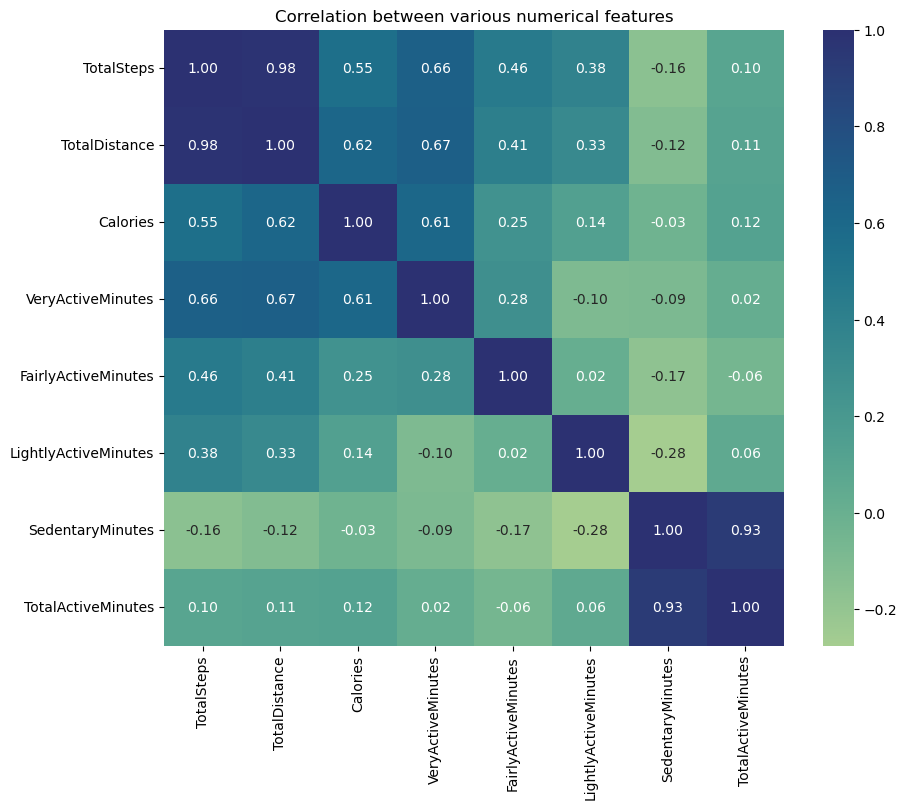

In [38]:
corr_daily_activity = daily_activity.drop(columns=["Id","ActivityDate", "Day"])
fig = plt.subplots(figsize=(10,8))
corr_heatmap = sns.heatmap(corr_daily_activity.corr(), annot=True, fmt=".2f", cmap="crest")
corr_heatmap.set(title="Correlation between various numerical features")
plt.show()

#### <font color ="green"> Here we see that there is an obvious positive correlation between Total Steps and Total Distance. Logically the more steps person makes - the bigger distance is covered. Respectively, the Very Active Minutes lead to bigger Total Distance covered. <br><br> Another important item we need to note is the Correlation between Total Distance and Calories is not that strong.<br><br> Let's build a separate plot to see it.</font>

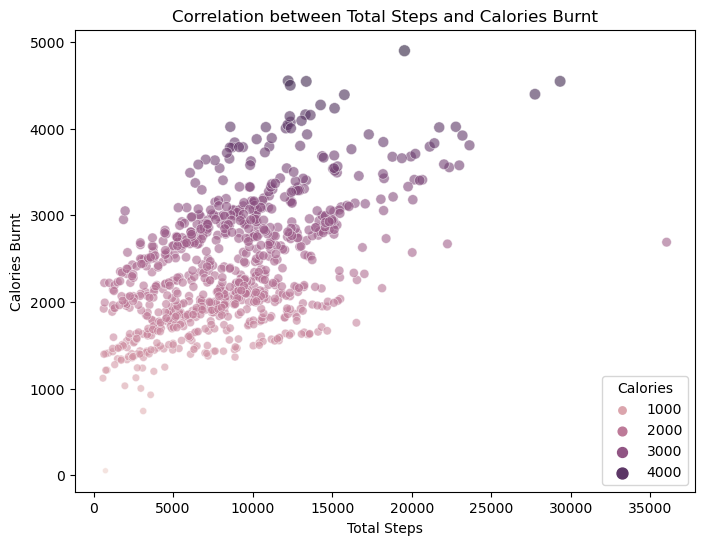

In [39]:
fig = plt.subplots(figsize=(8,6))
scatter_plot = sns.scatterplot(data=daily_activity, x="TotalSteps", y="Calories", 
                            size="Calories", hue="Calories", alpha=0.6)
scatter_plot.set(xlabel='Total Steps', ylabel="Calories Burnt", 
              title = "Correlation between Total Steps and Calories Burnt")
sns.move_legend(scatter_plot, loc="lower right")
plt.show()

#### <font color ="green"> As we see, the correlation is not that strong here as the spread of data is rather wide. I might depend on the fact that different people need different amount of physical activity to burn same amount of calories. Another reason might be the accuracy of the device used.</font>

Now, let's aggregate the data by days of week, to see which days are usually more active.

First, let's see if we have same amount of records for each day:

In [40]:
daily_activity["Day"].value_counts()

Day
Wednesday    136
Tuesday      135
Thursday     130
Friday       117
Saturday     111
Sunday       107
Monday       106
Name: count, dtype: int64

We see that there are 136 records with Wednesday and just 106 records with Monday, which means, if we we just summarize the features, the data will not represent real picture as potentially sum of TotalSteps for Wednesday will be bigger, not because of higher user activity, but because of availability of bigger set of records.<br>
Thus we will use "mean" parameter in our aggregation function, to get the averaged value per day of week. 

In [41]:
weekday_activity = daily_activity.groupby("Day")[["TotalSteps", "TotalDistance", "Calories",
                                                   "TotalActiveMinutes"]].agg("mean").round(2)
week_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekday_activity = weekday_activity.reindex(week_order).reset_index()
weekday_activity

Day  TotalSteps  TotalDistance  Calories  TotalActiveMinutes
0     Sunday     7836.22           5.68   2326.63             1167.87
1     Monday     8799.73           6.28   2396.27             1234.58
2    Tuesday     9144.75           6.56   2463.00             1230.49
3  Wednesday     8334.84           6.05   2355.39             1192.97
4   Thursday     8372.22           6.01   2296.25             1164.94
5     Friday     8019.16           5.72   2379.03             1233.29
6   Saturday     9105.35           6.54   2442.28             1193.41

Now let's plot above table to have its clear visual representation:

In [42]:
ticks_names = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
tick_vals = [0,1,2,3,4,5,6]

# Initializing figure and subplots
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Average Steps per Day Of The Week", 
                                   "Average Distance per Day Of The Week",
                                   "Average Calories Burnt per Day Of The Week", 
                                   "Average Active Minutes per Day Of The Week"))

# Adding traces
fig.add_trace(go.Bar(name="fig_1", y=weekday_activity["Day"], x=weekday_activity["TotalSteps"], 
                     orientation="h"), row=1, col=1)
fig.add_trace(go.Bar(name="fig_2", y=weekday_activity["Day"], x=weekday_activity["TotalDistance"], 
                     orientation="h"), row=1, col=2)
fig.add_trace(go.Bar(name="fig_3", y=weekday_activity["Day"], x=weekday_activity["Calories"], 
                     orientation="h"), row=2, col=1)
fig.add_trace(go.Bar(name="fig_4", y=weekday_activity["Day"], x=weekday_activity["TotalActiveMinutes"], 
                     orientation="h"), row=2, col=2)

# Updating xaxis propertis
fig.update_xaxes(title_text="Average Total Steps Per Day", row=1, col=1)
fig.update_xaxes(title_text="Average Total Distance Per Day", row=1, col=2)
fig.update_xaxes(title_text="Average Calories Burnt Per Day", row=2, col=1)
fig.update_xaxes(title_text="Average Total Active Minutes Per Day", row=2, col=2)

# Updating yaxis propertis
fig.update_yaxes(title_text="Day Of The Week", tickvals=tick_vals, ticktext=ticks_names, row=1, col=1)
fig.update_yaxes(title_text="Day Of The Week", tickvals=tick_vals, ticktext=ticks_names, row=1, col=2)
fig.update_yaxes(title_text="Day Of The Week", tickvals=tick_vals, ticktext=ticks_names, row=2, col=1)
fig.update_yaxes(title_text="Day Of The Week", tickvals=tick_vals, ticktext=ticks_names, row=2, col=2)

#
fig.update_traces(marker_color="dodgerblue", marker_line_color="black", row=1, col=1)
fig.update_traces(marker_color="gold", marker_line_color="black", row=1, col=2)
fig.update_traces(marker_color="lightseagreen", marker_line_color="black", row=2, col=1)
fig.update_traces(marker_color="crimson", marker_line_color="black", row=2, col=2)

# Updating title
fig.update_layout(title_text = "Averaged Features Per Day Of The Week", title_x=0.5,
                  height=800, width=900, showlegend=False)

fig.show()

#### <font color="green"> As we see, the difference is not critical. Monday, Tuesday and Saturday are the days with bigger activity, whereas Thursday, Friday and Sunday are the days with lower activity.</font>

Let's now see the breakdown of the activity types:

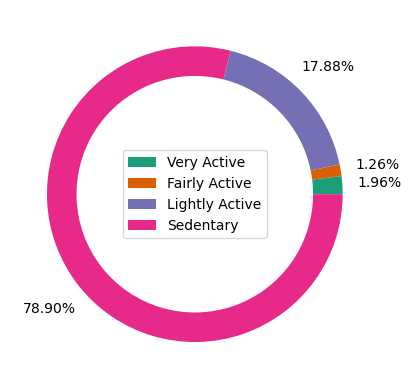

In [43]:
total_very_active_mins = daily_activity["VeryActiveMinutes"].sum()
total_fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
total_lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
total_sedentary_mins = daily_activity["SedentaryMinutes"].sum()

activity_data = [total_very_active_mins, total_fairly_active_mins,
                 total_lightly_active_mins, total_sedentary_mins]
keys=["Very Active", "Fairly Active", "Lightly Active", "Sedentary"]
palette_color = sns.color_palette("Dark2")

pie_chart = plt.pie(activity_data, colors=palette_color,
                   wedgeprops={'width': 0.2}, autopct="%.2f%%", pctdistance=1.25)
plt.legend(labels=keys, loc="best")
plt.show()

We have concluded above that the respondents are not very active people. Well, this graph confirms our statement, **78.9%** of total time is **Sedentary**, **Lightly Active** time share is equal to **17.88%**, both **Fairly Active** and **Very Active** shares are **less than 2%**.

Now let's build a plot showing heartrate of users:

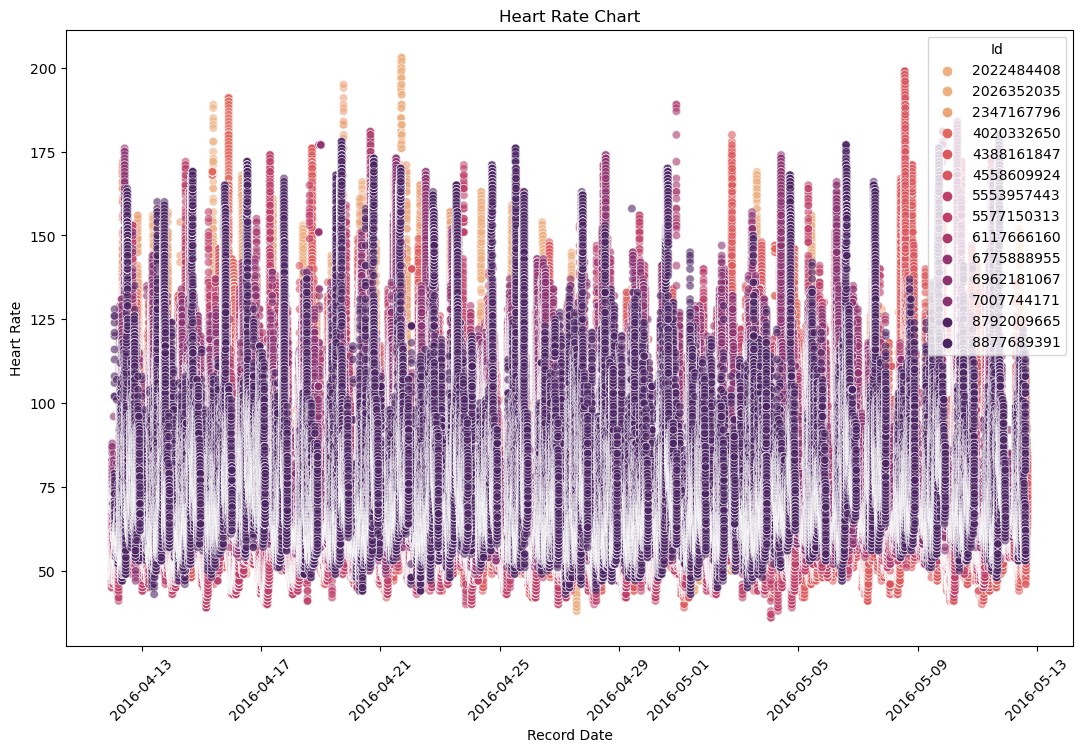

In [44]:
fig = plt.subplots(figsize=(13,8))
palette = palette_color = sns.color_palette("flare", as_cmap=True)
scatter_heart = sns.scatterplot(data=heartrate_seconds, x="Time", y="Value", hue="Id", alpha=0.6, legend="full",
                               palette=palette)
scatter_heart.set(xlabel='Record Date', ylabel="Heart Rate", title = "Heart Rate Chart")
scatter_heart.xaxis.set_tick_params(rotation=45)
sns.move_legend(scatter_heart, loc="upper right")
plt.show()

#### <font color="green"> As seen from the chart above, the average heart rate is within norm, however there are occasions when we see very high heart rate. As the dataset does not have clear breakdown of acivity intensity and relevant heart rate, it's hard to make an assumption whether said high heart rate is connected with physical activity or is a result of an anomaly. This parameter need further analysis, which requires additional data.</font>

Next, let's consider sleep data.

In this step we will explore quality of sleep during different days of week. In order to assess the quality of sleep, I will compare two parameters **TotalMinutesAsleep** and **TotalTimeInBed**. The lower difference between these two parameters - the better.

Let's see if we have same number of records for each day of week:

In [45]:
daily_sleep["Day"].value_counts()

Day
Wednesday    66
Tuesday      65
Thursday     64
Friday       57
Saturday     57
Sunday       55
Monday       46
Name: count, dtype: int64

As per above table, number of records per different days of week are not the same, thus assessing sum of relevant records will not bring us reliable result. In this case we proceed with assessing mean features.<br>
Let's manipulate our dataset to get data ready for analysis.

In [46]:
weekday_sleep = daily_sleep.groupby("Day")[["TotalMinutesAsleep", "TotalTimeInBed"]].agg("mean").round(2)
week_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekday_sleep = weekday_sleep.reindex(week_order).reset_index()
weekday_sleep["Difference"] = weekday_sleep["TotalTimeInBed"] - weekday_sleep["TotalMinutesAsleep"]
weekday_sleep

Day  TotalMinutesAsleep  TotalTimeInBed  Difference
0     Sunday              452.75          503.51       50.76
1     Monday              419.50          457.35       37.85
2    Tuesday              404.54          443.29       38.75
3  Wednesday              434.68          470.03       35.35
4   Thursday              401.30          434.88       33.58
5     Friday              405.42          445.05       39.63
6   Saturday              419.07          459.84       40.77

Let's plot the results:

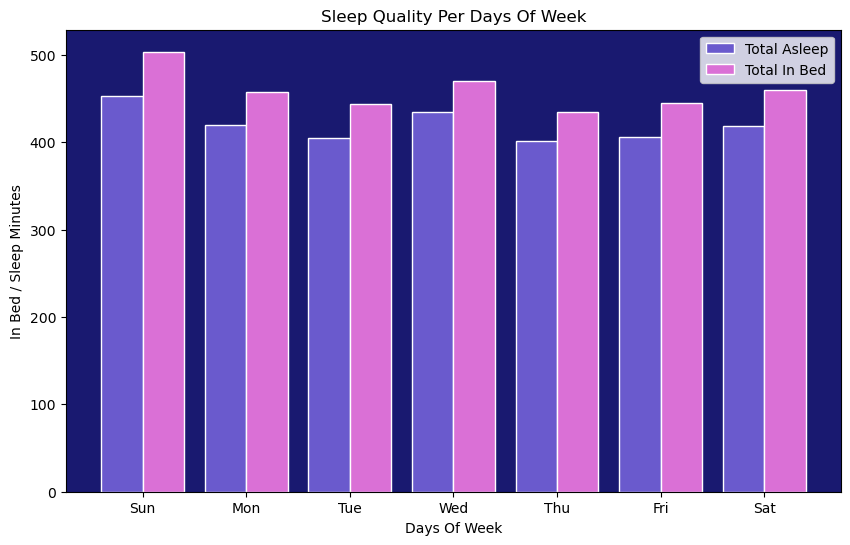

In [47]:
x_ticks_names = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
x_ticks_values = np.arange(len(x_ticks_names))

plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor("midnightblue")

plt.bar(x_ticks_values-0.2, weekday_sleep["TotalMinutesAsleep"], width=0.4, color="slateblue", edgecolor="white",
        label="Total Asleep")
plt.bar(x_ticks_values+0.2, weekday_sleep["TotalTimeInBed"], width=0.4, color="orchid", edgecolor="white",
        label="Total In Bed")
  
plt.xticks(x_ticks_values, x_ticks_names)

plt.xlabel("Days Of Week")
plt.ylabel("In Bed / Sleep Minutes")
plt.title("Sleep Quality Per Days Of Week")

# add legend 
plt.legend()

plt.show()

As we see, on average sleep is less consistent on Sunday and Thursday shows on average the best sleep quality result.

**SUMMARY** <br><br>
Let's recall that the dataset we analyzed is quite old (if we are talking about technology) and we do not have clear information of gender, ethnicity and age of the respondents.<br>
However, we can make some important conclusions:
* As per results of conducted analysis, the majority of wellness tracking device users actively use Calories / Steps / Distance / Activity time tracking functions;
* A bit less than a half of respondents found useful the function of heart rate monitoring. The dataset's analysis showed that 14 out of 33 respondents actively used it and their heart rate was mainly within the normal range. There were cases when heart rate reached high values, but as there were no sufficient data to assess whether it was connected with hight physical activity, stress or was it a result of some anomaly. Further and deeper analysis with additinal data resources is required;
* Weight log feature was not attractive to the respondents. Only 8 out of 33 users enjoyed using it, but it should be mentioned that the majority of records have been updated manually.
* The analyzed data might not directly serve as a benchmark for wellness devices designated for active women, as the analysis shows that the respondents have mainly sedentary life.
* 24 out of 33 respondents enjoyed sleep tracking function. We have also found out that Sleep quality on Sunday is the worst, whereas on Thursdays average sleep quality is the best.

**CONCLUSION** <br><br>
Life of a modern woman is very dynamic. The wellness devise she uses has to be practical and convenient to use, at the same time it has to be a high-tech solution, offeing a wide range of functions.<br>
Devices like **leaf** might not be convenient as it looks like a jewel and might affect style the woman wants to wear today. **Spring** smart bottle is a good idea to suport hydration levels, but also not convenient enough to accompany a woman during her daily tasks.<br>
**"Time"** smart-watch is the best choice as it a everyday-carry device, which can be easily combined with different styles.<br>
At the same time, this devise should be stuffed with various possible functionality, with strong emphasis on health features such as Steps count, Sleep monitor, Stress monitor, Heart Rate monitor, Distance tracker, Activity Level Tracker. All these features have proven to be of interest to our respondents and consistent tracking and statistics can help women to achieve their wellness goals.
Other features like weight log didn't prove to be very exciting, however, it can still be available as a side-feature for persons who are indeed keen to track their progress and are consistent in it.
Another suggestion would be to collect own data which will be representative for women. This dataset should include age groups and ethnicity, to help us find other pattern unavailable for current analysis. 
Collecting own data is a first step in becoming more technological company that is able to listen to preferences of it's customers and quickly respond with new products and features to their demand.

*Made by __Artur Azimov__*<br>
*March 12, 2024*